In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Superstore_Sales.csv")
data.shape

(793, 15)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      793 non-null    object
 1   max_order_date     793 non-null    object
 2   last_order_date    793 non-null    object
 3   MonetaryValue      793 non-null    int64 
 4   Frequency          793 non-null    int64 
 5   Recency            793 non-null    int64 
 6   rfm_Recency        793 non-null    int64 
 7   rfm_Frequency      793 non-null    int64 
 8   rfm_MonetaryValue  793 non-null    int64 
 9   rfm_code           793 non-null    int64 
 10  rfm_string_code    793 non-null    int64 
 11  Profit             793 non-null    int64 
 12  Quantity           793 non-null    int64 
 13  Total_Sales        793 non-null    int64 
 14  Discount           793 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 93.1+ KB


In [4]:
data.isnull().sum()

Customer_Name        0
max_order_date       0
last_order_date      0
MonetaryValue        0
Frequency            0
Recency              0
rfm_Recency          0
rfm_Frequency        0
rfm_MonetaryValue    0
rfm_code             0
rfm_string_code      0
Profit               0
Quantity             0
Total_Sales          0
Discount             0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.head()

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Total_Sales,Discount
0,Aaron Bergman,2018-12-30 00:00:00.0000000,2017-11-10 00:00:00.0000000,143818,6,415,1,1,1,3,111,1293465,13,143818,4
1,Aaron Hawkins,2018-12-30 00:00:00.0000000,2018-12-18 00:00:00.0000000,464630,11,12,5,3,2,10,532,1776741,54,464630,10
2,Aaron Smayling,2018-12-30 00:00:00.0000000,2018-10-03 00:00:00.0000000,2257567,10,88,3,2,5,10,325,-2480459,48,2257567,49
3,Adam Bellavance,2018-12-30 00:00:00.0000000,2018-11-06 00:00:00.0000000,5110574,18,54,3,5,5,13,355,19764208,56,5110574,8
4,Adam Hart,2018-12-30 00:00:00.0000000,2018-11-26 00:00:00.0000000,2343506,20,34,4,5,5,14,455,1734032,75,2343506,27


In [7]:
df = data.copy()

In [8]:
data["max_order_date"] = pd.to_datetime(data["max_order_date"])
data["last_order_date"] = pd.to_datetime(data["last_order_date"])


In [9]:
data.head(20)

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Total_Sales,Discount
0,Aaron Bergman,2018-12-30,2017-11-10,143818,6,415,1,1,1,3,111,1293465,13,143818,4
1,Aaron Hawkins,2018-12-30,2018-12-18,464630,11,12,5,3,2,10,532,1776741,54,464630,10
2,Aaron Smayling,2018-12-30,2018-10-03,2257567,10,88,3,2,5,10,325,-2480459,48,2257567,49
3,Adam Bellavance,2018-12-30,2018-11-06,5110574,18,54,3,5,5,13,355,19764208,56,5110574,8
4,Adam Hart,2018-12-30,2018-11-26,2343506,20,34,4,5,5,14,455,1734032,75,2343506,27
5,Adam Shillingsburg,2018-12-30,2018-12-02,1970668,25,28,4,5,4,13,454,472799,81,1970668,45
6,Adrian Barton,2018-12-30,2018-11-19,2898788,20,41,4,5,5,14,455,6459722,73,2898788,48
7,Adrian Hane,2018-12-30,2018-10-31,559349,16,60,3,4,2,9,342,1645976,65,559349,38
8,Adrian Shami,2018-12-30,2018-11-19,5882,3,41,4,1,1,6,411,93108,9,5882,2
9,Aimee Bixby,2018-12-30,2018-11-19,280163,12,41,4,3,2,9,432,3210262,37,280163,16


In [10]:
data.drop("Total_Sales", axis=1,inplace = True)

In [11]:
df = data[["MonetaryValue","Frequency","Recency"]]
df.head()

,MonetaryValue,Frequency,Recency
0,143818,6,415
1,464630,11,12
2,2257567,10,88
3,5110574,18,54
4,2343506,20,34


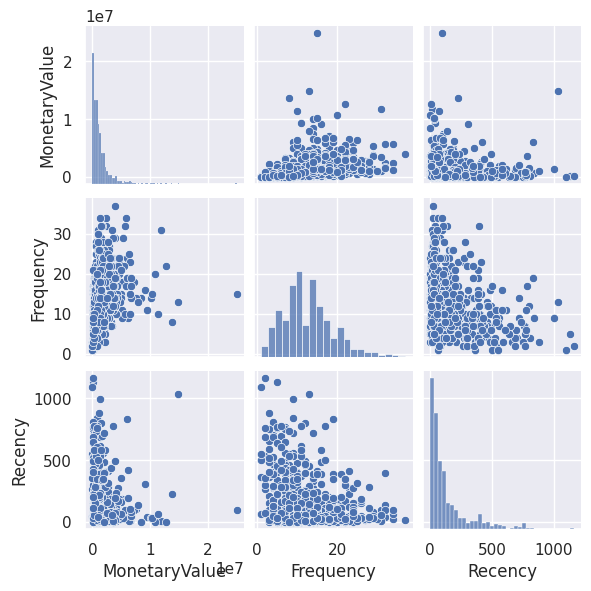

In [12]:
sns.set(style='darkgrid')
sns.pairplot(data[["MonetaryValue","Frequency","Recency"]], height=2)
plt.show()

<AxesSubplot:>

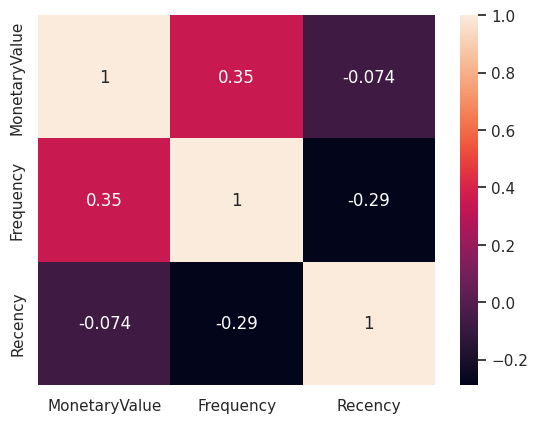

In [75]:
sns.heatmap(df.corr(), annot=True)

In [13]:
data['rfm_code'] = data['rfm_code'].astype(float)
data['Profit'] = data['rfm_code'].astype(float)
data['MonetaryValue'] = data['rfm_code'].astype(object)
data['Frequency'] = data['rfm_code'].astype(float)
data['Recency'] = data['rfm_code'].astype(float)
data['Quantity'] = data['rfm_code'].astype(float)

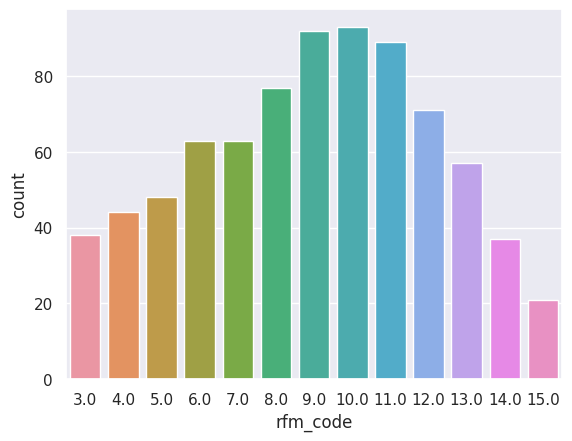

In [14]:
sns.countplot(data['rfm_code'])
plt.show()

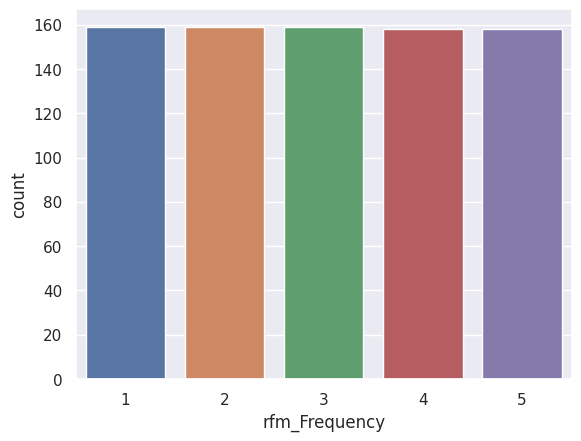

In [15]:
sns.countplot(data['rfm_Frequency'])
plt.show()

In [16]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [17]:
scaled_df

array([[-0.65451919, -1.05837074,  1.44212722],
       [-0.49087788, -0.25691161, -0.72460954],
       [ 0.42367198, -0.41720344, -0.31599417],
       ...,
       [ 0.25180351, -0.73778709, -0.76762168],
       [ 0.9977581 ,  2.9489249 , -0.49879578],
       [-0.64433688, -0.57749527,  0.29692889]])

In [18]:
inertia = []
range_val = range(1,10)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)

inertia

[2379.0000000000005,
 1678.90058383427,
 1168.418931665615,
 866.5977008978549,
 741.6027586155687,
 642.513753166593,
 555.1623342606442,
 503.44153489588376,
 457.98709401248163]

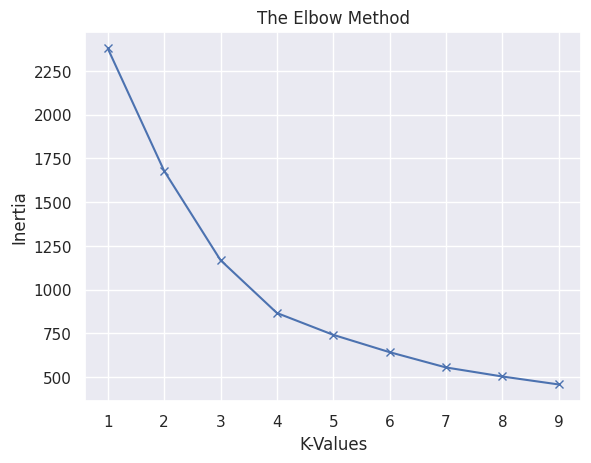

In [19]:
plt.plot(range_val,inertia,'bx-')
plt.xlabel('K-Values') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method') 
plt.show()

In [20]:
kmeans = KMeans(n_clusters=4)           
kmeans.fit_predict(scaled_df)         
labels = kmeans.labels_
kmeans.inertia_

866.5549598073185

In [21]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.775195,0.670055
1,-0.098299,-0.879947
2,0.104648,0.008331
3,1.870716,0.827138
4,1.355430,-0.135761
...,...,...
788,1.822117,-0.486154
789,0.895960,0.109148
790,0.009109,-0.460889
791,2.793750,0.340731


In [22]:
pca_df["cluster"] = labels
pca_df.head()

,PCA1,PCA2,cluster
0,-1.775195,0.670055,2
1,-0.098299,-0.879947,1
2,0.104648,0.008331,1
3,1.870716,0.827138,0
4,1.355430,-0.135761,0


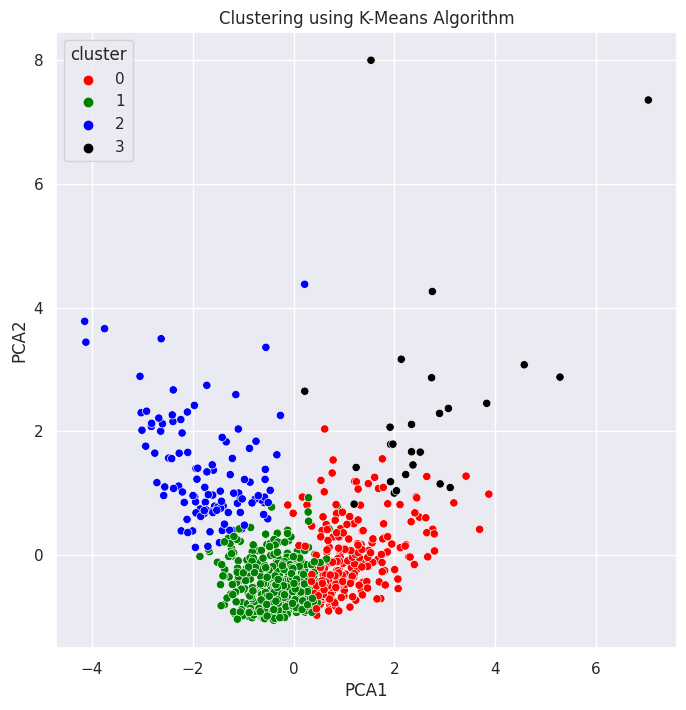

In [25]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [29]:
data.drop(["cluster"],axis=1, inplace = True) 
data.head()

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Discount
0,Aaron Bergman,2018-12-30,2017-11-10,3.0,3.0,3.0,1,1,1,3.0,111,3.0,3.0,4
1,Aaron Hawkins,2018-12-30,2018-12-18,10.0,10.0,10.0,5,3,2,10.0,532,10.0,10.0,10
2,Aaron Smayling,2018-12-30,2018-10-03,10.0,10.0,10.0,3,2,5,10.0,325,10.0,10.0,49
3,Adam Bellavance,2018-12-30,2018-11-06,13.0,13.0,13.0,3,5,5,13.0,355,13.0,13.0,8
4,Adam Hart,2018-12-30,2018-11-26,14.0,14.0,14.0,4,5,5,14.0,455,14.0,14.0,27


In [62]:
clustered_df = data.copy()
clustered_df["cluster"] = labels
clustered_df.head()

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Discount,cluster
0,Aaron Bergman,2018-12-30,2017-11-10,3.0,3.0,3.0,1,1,1,3.0,111,3.0,3.0,4,2
1,Aaron Hawkins,2018-12-30,2018-12-18,10.0,10.0,10.0,5,3,2,10.0,532,10.0,10.0,10,0
2,Aaron Smayling,2018-12-30,2018-10-03,10.0,10.0,10.0,3,2,5,10.0,325,10.0,10.0,49,0
3,Adam Bellavance,2018-12-30,2018-11-06,13.0,13.0,13.0,3,5,5,13.0,355,13.0,13.0,8,1
4,Adam Hart,2018-12-30,2018-11-26,14.0,14.0,14.0,4,5,5,14.0,455,14.0,14.0,27,1


In [63]:
clustered_df["cluster"].value_counts()

0    434
1    223
2    110
3     26
Name: cluster, dtype: int64

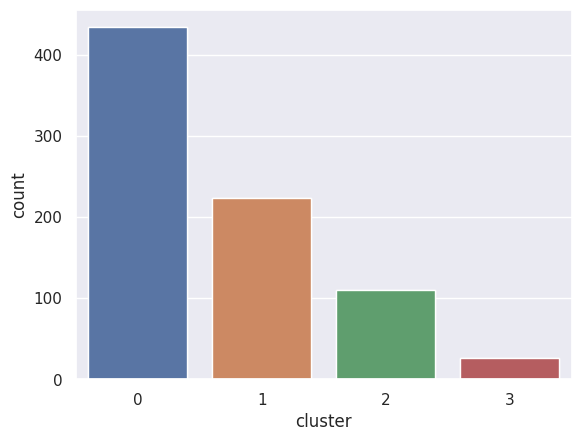

In [42]:
sns.countplot(x='cluster', data=clustered_df)
plt.show()

In [39]:
cluster_0 = clustered_df[clustered_df["cluster"]==0]
cluster_0.head()

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Discount,cluster
1,Aaron Hawkins,2018-12-30,2018-12-18,10.0,10.0,10.0,5,3,2,10.0,532,10.0,10.0,10,0
2,Aaron Smayling,2018-12-30,2018-10-03,10.0,10.0,10.0,3,2,5,10.0,325,10.0,10.0,49,0
7,Adrian Hane,2018-12-30,2018-10-31,9.0,9.0,9.0,3,4,2,9.0,342,9.0,9.0,38,0
8,Adrian Shami,2018-12-30,2018-11-19,6.0,6.0,6.0,4,1,1,6.0,411,6.0,6.0,2,0
9,Aimee Bixby,2018-12-30,2018-11-19,9.0,9.0,9.0,4,3,2,9.0,432,9.0,9.0,16,0


In [50]:
cluster_0_temp = cluster_0.describe()
cluster_0_temp.style.background_gradient(cmap='Oranges')

,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Discount,cluster
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,8.133641,8.133641,3.241935,2.377880,2.513825,8.133641,350.486175,8.133641,8.133641,15.783410,0.000000
std,2.277639,2.277639,1.241690,1.005789,1.234995,2.277639,125.901648,2.277639,2.277639,10.677472,0.000000
min,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,111.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,6.000000,2.000000,2.000000,1.000000,6.000000,233.000000,6.000000,6.000000,8.000000,0.000000
50%,8.000000,8.000000,3.000000,2.000000,2.000000,8.000000,332.000000,8.000000,8.000000,14.000000,0.000000
75%,10.000000,10.000000,4.000000,3.000000,3.000000,10.000000,434.000000,10.000000,10.000000,21.000000,0.000000
max,13.000000,13.000000,5.000000,4.000000,5.000000,13.000000,544.000000,13.000000,13.000000,69.000000,0.000000


In [43]:
cluster_1 = clustered_df[clustered_df["cluster"]==1]
cluster_1.head()

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Discount,cluster
3,Adam Bellavance,2018-12-30,2018-11-06,13.0,13.0,13.0,3,5,5,13.0,355,13.0,13.0,8,1
4,Adam Hart,2018-12-30,2018-11-26,14.0,14.0,14.0,4,5,5,14.0,455,14.0,14.0,27,1
5,Adam Shillingsburg,2018-12-30,2018-12-02,13.0,13.0,13.0,4,5,4,13.0,454,13.0,13.0,45,1
6,Adrian Barton,2018-12-30,2018-11-19,14.0,14.0,14.0,4,5,5,14.0,455,14.0,14.0,48,1
20,Alex Avila,2018-12-30,2018-06-29,10.0,10.0,10.0,2,3,5,10.0,235,10.0,10.0,10,1


In [55]:
cluster_1_temp = cluster_1.describe()
cluster_1_temp.style.background_gradient(cmap="icefire")

,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Discount,cluster
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,12.147982,12.147982,3.461883,4.645740,4.040359,12.147982,396.686099,12.147982,12.147982,36.210762,1.000000
std,1.608139,1.608139,1.254588,0.524247,1.032440,1.608139,125.476175,1.608139,1.608139,18.319622,0.000000
min,8.000000,8.000000,1.000000,3.000000,1.000000,8.000000,135.000000,8.000000,8.000000,4.000000,1.000000
25%,11.000000,11.000000,2.000000,4.000000,3.000000,11.000000,255.000000,11.000000,11.000000,23.500000,1.000000
50%,12.000000,12.000000,4.000000,5.000000,4.000000,12.000000,444.000000,12.000000,12.000000,33.000000,1.000000
75%,13.000000,13.000000,5.000000,5.000000,5.000000,13.000000,542.000000,13.000000,13.000000,48.000000,1.000000
max,15.000000,15.000000,5.000000,5.000000,5.000000,15.000000,555.000000,15.000000,15.000000,107.000000,1.000000


In [45]:
cluster_2 = clustered_df[clustered_df["cluster"]==2]
cluster_2.head()

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Discount,cluster
0,Aaron Bergman,2018-12-30,2017-11-10,3.0,3.0,3.0,1,1,1,3.0,111,3.0,3.0,4,2
34,Andy Gerbode,2018-12-30,2016-09-07,6.0,6.0,6.0,1,2,3,6.0,123,6.0,6.0,14,2
37,Anemone Ratner,2018-12-30,2017-07-14,3.0,3.0,3.0,1,1,1,3.0,111,3.0,3.0,0,2
53,Anthony O'Donnell,2018-12-30,2017-08-16,3.0,3.0,3.0,1,1,1,3.0,111,3.0,3.0,2,2
58,Art Foster,2018-12-30,2017-11-10,4.0,4.0,4.0,1,1,2,4.0,112,4.0,4.0,18,2


In [56]:
cluster_2_temp = cluster_2.describe()
cluster_2_temp.style.background_gradient(cmap="Spectral")

,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Discount,cluster
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,5.209091,5.209091,1.000000,1.900000,2.309091,5.209091,121.309091,5.209091,5.209091,12.963636,2.000000
std,2.129287,2.129287,0.000000,1.108350,1.311526,2.129287,11.849783,2.129287,2.129287,11.668925,0.000000
min,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,111.000000,3.000000,3.000000,0.000000,2.000000
25%,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,111.000000,3.000000,3.000000,4.000000,2.000000
50%,4.500000,4.500000,1.000000,1.000000,2.000000,4.500000,114.000000,4.500000,4.500000,11.000000,2.000000
75%,7.000000,7.000000,1.000000,3.000000,3.000000,7.000000,132.000000,7.000000,7.000000,18.000000,2.000000
max,11.000000,11.000000,1.000000,5.000000,5.000000,11.000000,155.000000,11.000000,11.000000,66.000000,2.000000


In [60]:
cluster_3 = clustered_df[clustered_df["cluster"]==3]
cluster_3.head(36)

,Customer_Name,max_order_date,last_order_date,MonetaryValue,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Discount,cluster
30,Amy Hunt,2018-12-30,2018-05-14,8.0,8.0,8.0,1,2,5,8.0,125,8.0,8.0,40,3
44,Anna Gayman,2018-12-30,2018-09-24,12.0,12.0,12.0,3,4,5,12.0,345,12.0,12.0,53,3
75,Becky Martin,2018-12-30,2018-02-26,10.0,10.0,10.0,1,4,5,10.0,145,10.0,10.0,27,3
156,Christopher Conant,2018-12-30,2018-11-17,12.0,12.0,12.0,4,3,5,12.0,435,12.0,12.0,31,3
158,Christopher Schild,2018-12-30,2018-12-28,14.0,14.0,14.0,5,4,5,14.0,545,14.0,14.0,111,3
164,Cindy Schnelling,2018-12-30,2017-11-01,8.0,8.0,8.0,1,2,5,8.0,125,8.0,8.0,63,3
167,Claudia Bergmann,2018-12-30,2018-06-16,12.0,12.0,12.0,2,5,5,12.0,255,12.0,12.0,23,3
175,Corinna Mitchell,2018-12-30,2018-12-03,11.0,11.0,11.0,4,2,5,11.0,425,11.0,11.0,36,3
176,Craig Carreira,2018-12-30,2018-12-01,13.0,13.0,13.0,4,4,5,13.0,445,13.0,13.0,37,3
179,Craig Molinari,2018-12-30,2016-03-01,9.0,9.0,9.0,1,3,5,9.0,135,9.0,9.0,69,3


In [57]:
cluster_3_temp = cluster_3.describe()
cluster_3_temp.style.background_gradient(cmap="coolwarm")

,Frequency,Recency,rfm_Recency,rfm_Frequency,rfm_MonetaryValue,rfm_code,rfm_string_code,Profit,Quantity,Discount,cluster
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,12.153846,12.153846,3.346154,3.807692,5.000000,12.153846,377.692308,12.153846,12.153846,45.576923,3.000000
std,2.221573,2.221573,1.440620,1.096147,0.000000,2.221573,150.108166,2.221573,2.221573,26.015646,0.000000
min,8.000000,8.000000,1.000000,2.000000,5.000000,8.000000,125.000000,8.000000,8.000000,6.000000,3.000000
25%,10.250000,10.250000,2.000000,3.000000,5.000000,10.250000,247.500000,10.250000,10.250000,28.000000,3.000000
50%,13.000000,13.000000,4.000000,4.000000,5.000000,13.000000,430.000000,13.000000,13.000000,39.500000,3.000000
75%,13.750000,13.750000,4.750000,5.000000,5.000000,13.750000,520.000000,13.750000,13.750000,62.500000,3.000000
max,15.000000,15.000000,5.000000,5.000000,5.000000,15.000000,555.000000,15.000000,15.000000,111.000000,3.000000


<AxesSubplot:xlabel='rfm_Frequency', ylabel='MonetaryValue'>

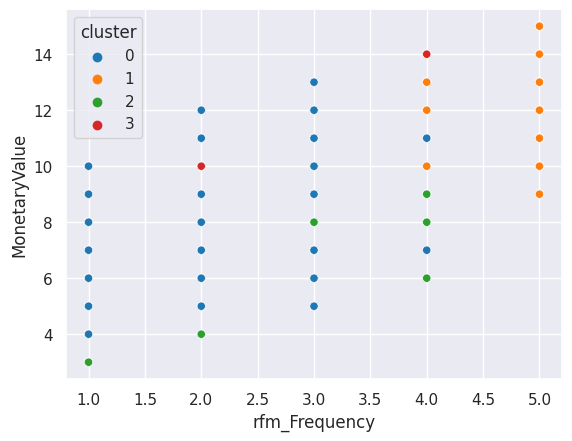

In [77]:
sns.scatterplot(x="rfm_Frequency", y="MonetaryValue", hue="cluster",data=clustered_df,palette="tab10")